In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.integrate import quad
plt.style.use('ggplot')
%matplotlib inline

## Exercise 7.14

In [4]:
def metropolis_hastings_normal(f, variance, x0, K, N):
    ''' 
    Draws samples from the f distribution using 
    the Metropolis-Hasting algorithm for MCMC
    The normal distribution is used for proposal sampling
    
    Parameters:
    f - distribution to sample from
    variance - variance of normal distribution to sample from
    x0 - starting value
    K - number of steps to take in "burn out" stage
    N - number of samples
    
    Returns:
    samples - samples that were drawn using 
    '''
    samples = []
    xt = x0
    for t in range(1,N+K+1):
        y = np.random.randn() + xt
        Axy = np.min([1, f(y)/float(f(xt))])
        if np.random.random() <= Axy:
            xt = y
        if t > K:
            samples.append(xt)
    return np.array(samples)

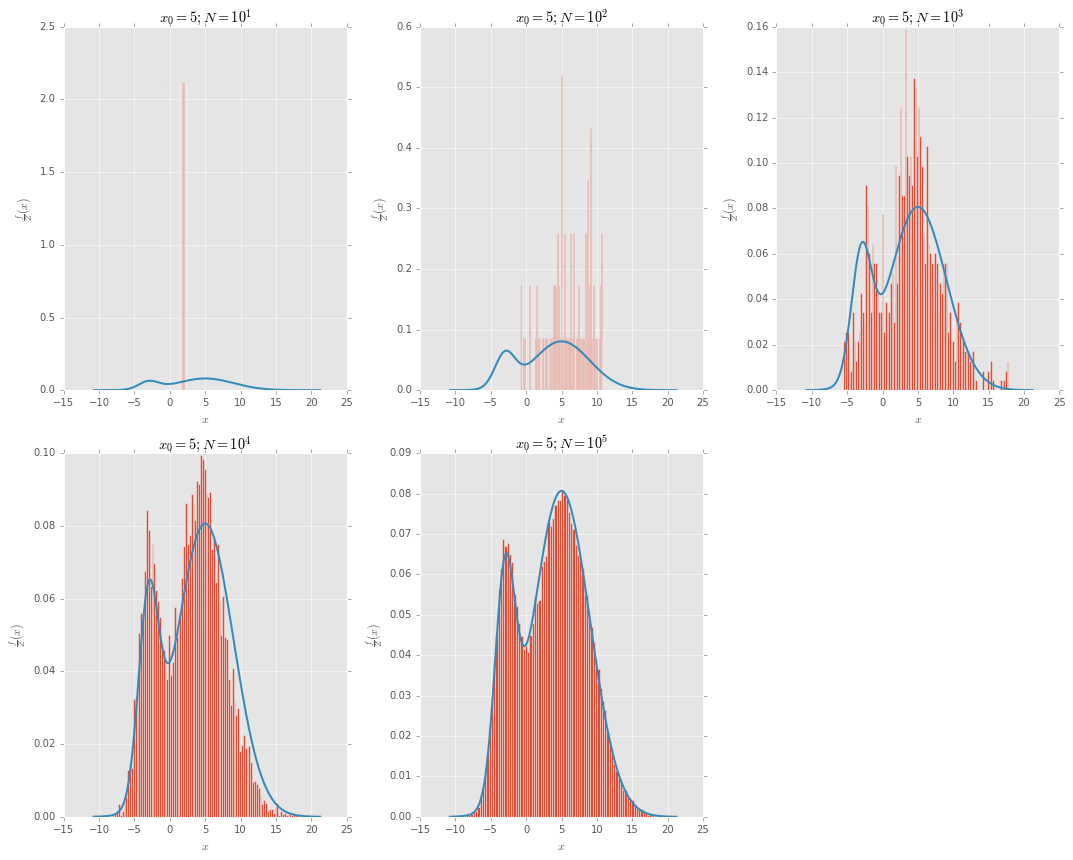

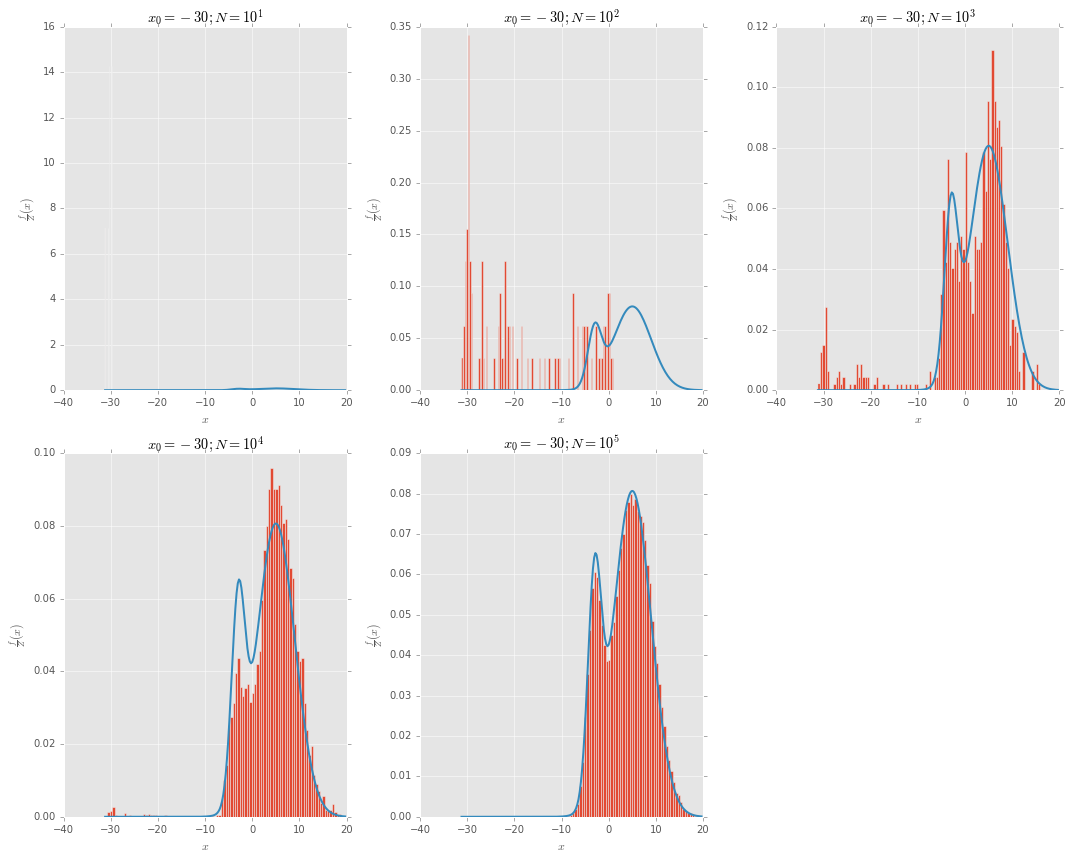

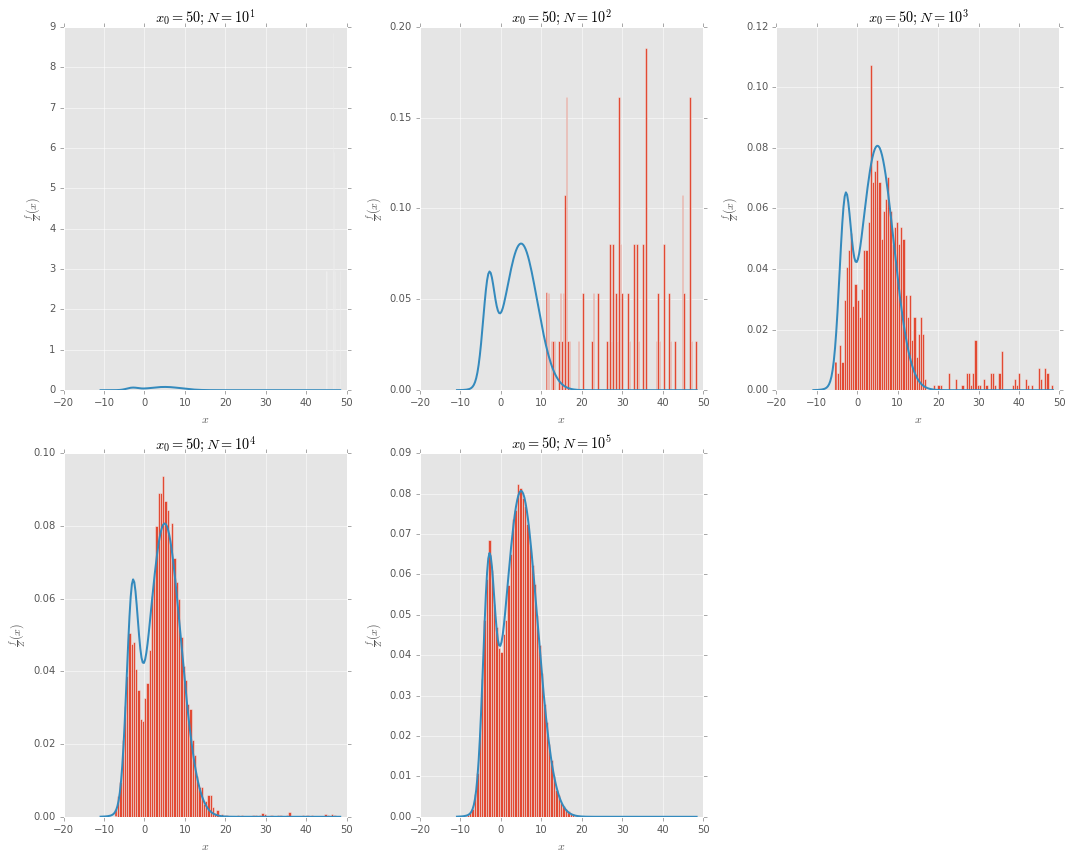

In [11]:
f = lambda x: 4*np.exp(-(x + 3.)**2 / 4.) + 6*np.exp(-(x-5.)**2 / 32.)
samples = metropolis_hastings_normal(f, 1., 5., 0, 10**5)
Z = quad(f, -np.inf, np.inf)[0]
fZ = lambda x: f(x)/Z

def plot_hist(samples, pdf, title, xbounds):
    # create figure
    plt.hist(samples, normed=True, bins=100)
    X = np.linspace(xbounds[0], xbounds[1], 200)
    plt.plot(X,pdf(X), lw=2, label='PDF')    
    plt.rc('text',usetex=True)
    plt.xlabel('$x$')
    plt.ylabel(r"$\frac{f}{Z}(x)$")
    plt.title(title)
    plt.rc('text', usetex=False)
    # plt.show()
    
for i in [[5.,'$x_0 = 5; N = 10^{}$'],[-30.,'$x_0 = -30; N = 10^{}$'],[50.,'$x_0 = 50; N = 10^{}$']]:
    samples = metropolis_hastings_normal(f,1.,i[0],0,10**5)
    plt.figure(figsize = (15,12))
    for k in range(1,6):
        plt.subplot(2,3,k)
        plot_hist(samples[:10**k], fZ, i[1].format(k), [samples.min(), samples.max()])
    plt.tight_layout()
    plt.show()

I would choose $K=100$ because in all of these graphs it seems like there is starting to be a few points in the main part of the distribution at that point, and it will likely stay in there after that.

## Exercise 7.15

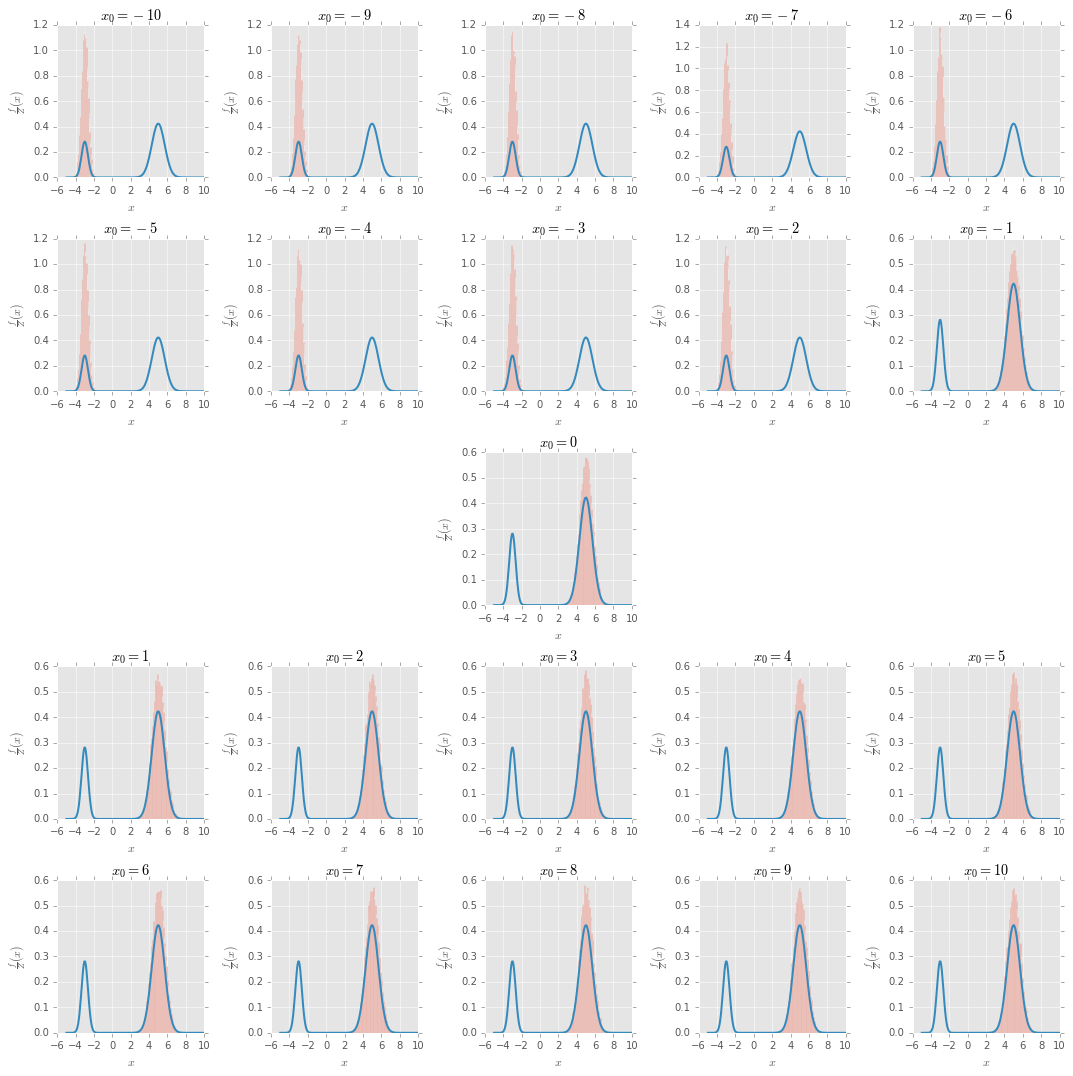

In [19]:
f = lambda x: 4*np.exp(-(x + 3)**2 / .25) + 6*np.exp(-(x - 5)**2)
Z = quad(f, -np.inf, np.inf)[0]
fZ = lambda x: f(x)/Z
plt.figure(figsize = (15,15))
for x0 in range(-10,11):
    samples = metropolis_hastings_normal(f, 1., x0, 10**5, 10**5)
    if x0 < 0:
        plt.subplot(5,5,x0+11)
    elif x0 == 0:
        plt.subplot(5,5,13)
    else:
        plt.subplot(5,5,x0+15)
    plot_hist(samples, fZ, '$x_0 = {}$'.format(x0), [-5., 10.])
plt.tight_layout()
plt.show()

I cannot use any of my previous estimates to estimate the value of Z, because it doesn't ever get samples in both peak areas of the distribution.

It seems like the following part of the homework set is a typo, where as it looks like the end of the previous problem copy and pasted. Doesn't make a ton of sense.

C:\Users\matts\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars


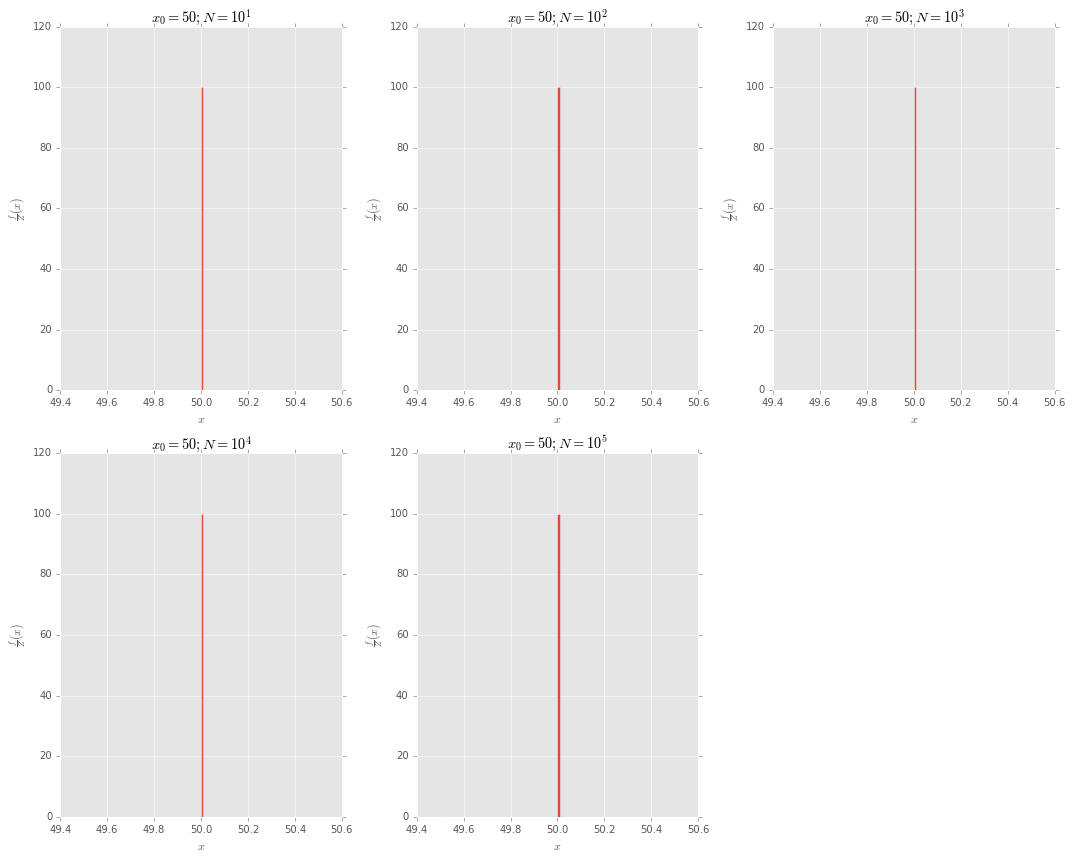

In [7]:
f = lambda x: 4*np.exp(-(x + 3)**2 / .25) + 6*np.exp(-(x - 5)**2)
Z = quad(f, -np.inf, np.inf)[0]
fZ = lambda x: f(x)/Z

samples = metropolis_hastings_normal(f,1.,50.,0,10**5)
plt.figure(figsize = (15,12))
for k in range(1,6):
    plt.subplot(2,3,k)
    plot_hist(samples[:10**k], fZ, '$x_0 = 50; N = 10^{}$'.format(k), [samples.min(), samples.max()])
plt.tight_layout()
plt.show()

It appears that there is no K that will allow this to become a reasonable starting value.

## Exercise 7.16

In [8]:
def metropolis_hastings_uniform(f, L, x0, K, N):
    ''' 
    Draws samples from the f distribution using 
    the Metropolis-Hasting algorithm for MCMC
    The uniform distribution is used for proposal sampling
    
    Parameters:
    f - distribution to sample from
    L - window size of uniform distribution to sample from
    x0 - starting value
    K - number of steps to take in "burn out" stage
    N - number of samples
    
    Returns:
    samples - samples that were drawn using 
    '''
    samples = []
    xt = x0
    for t in range(1,N+K+1):
        y = np.random.randn() + xt
        Axy = np.min([1, f(y)/float(f(xt))])
        if np.random.random() <= Axy:
            xt = y
        if t > K:
            samples.append(xt)
    return np.array(samples)

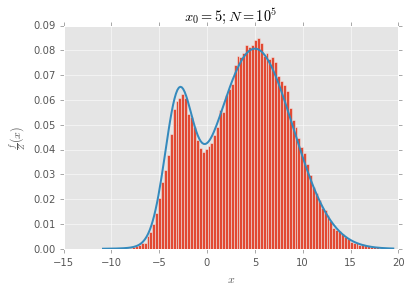

In [10]:
f = lambda x: 4*np.exp(-(x+3)**2 / 4.) + 6.*np.exp(-(x-5)**2 / 32)
Z = quad(f, -np.inf, np.inf)[0]
fZ = lambda x: f(x) / Z

samples = metropolis_hastings_uniform(f, 1., 5., 10**5, 10**5)
plot_hist(samples, fZ, "$x_0 = 5; N = 10^5$", [samples.min(), samples.max()])